<a href="https://colab.research.google.com/github/emgrimm42/NLP_Modules/blob/main/Grimm_Analyse_and_Visualize_Datasets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Analyse and Visualize a Dataset

In [ ]:
import pandas as pd
import string
import nltk
from nltk.corpus import stopwords
from collections import defaultdict, Counter
import matplotlib.pyplot as plt
import numpy as np
from wordcloud import WordCloud
import plotly.graph_objects as go

## Importing Data to the Notebook

In order to access our course data, we clone the course GitHub repository to this notebook. Do do so, run the *git clone* cell below:

In [ ]:
!git clone https://github.com/soberbichler/NLP-Course4Humanities_2025.github.io.git

Cloning into 'NLP-Course4Humanities_2025.github.io'...
remote: Enumerating objects: 1715, done.
remote: Counting objects: 100% (93/93), done.
remote: Compressing objects: 100% (69/69), done.
remote: Total 1715 (delta 66), reused 23 (delta 23), pack-reused 1622 (from 2)
Receiving objects: 100% (1715/1715), 83.00 MiB | 24.91 MiB/s, done.
Resolving deltas: 100% (985/985), done.


In [ ]:
import pandas as pd

# Replace 'your_file.xlsx' with the actual path to your Excel file.
df = pd.read_excel('/content/NLP-Course4Humanities_2025.github.io/datasets/kölnische_Zeitung_earthquake_articles.xlsx')

# Display the first few rows of the DataFrame to verify it's loaded correctly.
df.head(5)

page_id  pagenumber  \
0  3ML37O5BXQD3EYOR5S777GQZKGDOCDIM-ALTO8633337_D...           2   
1  42H5V33ALNFVOIG4SBM4YW3WQVKKHDMO-ALTO8384861_D...          10   
2  42H5V33ALNFVOIG4SBM4YW3WQVKKHDMO-ALTO8384865_D...          14   
3  477TOWWZGBGVO2T47FBUNYAPVERZTJQC-ALTO8170232_D...           2   
4  477TOWWZGBGVO2T47FBUNYAPVERZTJQC-ALTO8170232_D...           2   

                    paper_title                   provider_ddb_id  \
0  Kölnische Zeitung. 1803-1945  VKNQFFAKOR4XZWJJKUX3NGYSZ3QZAXCW   
1  Kölnische Zeitung. 1803-1945  VKNQFFAKOR4XZWJJKUX3NGYSZ3QZAXCW   
2  Kölnische Zeitung. 1803-1945  VKNQFFAKOR4XZWJJKUX3NGYSZ3QZAXCW   
3  Kölnische Zeitung. 1803-1945  VKNQFFAKOR4XZWJJKUX3NGYSZ3QZAXCW   
4  Kölnische Zeitung. 1803-1945  VKNQFFAKOR4XZWJJKUX3NGYSZ3QZAXCW   

                                            provider     zdb_id  \
0  Universitäts- und Landesbibliothek der Rheinis...  2719361-5   
1  Universitäts- und Landesbibliothek der Rheinis...  2719361-5   
2  Universitäts- und Landesbibliothek der Rheinis...  2719361-5   
3  Universitäts- und Landesbibliothek der Rheinis...  2719361-5   
4  Universitäts- und Landesbibliothek der Rheinis...  2719361-5   

     publication_date                      place_of_distribution language  \
0 1911-12-23 12:00:00  ['Köln', 'Kleve (Kreis Kleve)', 'Jülich']  ['ger']   
1 1910-06-07 12:00:00  ['Köln', 'Kleve (Kreis Kleve)', 'Jülich']  ['ger']   
2 1910-06-07 12:00:00  ['Köln', 'Kleve (Kreis Kleve)', 'Jülich']  ['ger']   
3 1909-04-18 12:00:00  ['Köln', 'Kleve (Kreis Kleve)', 'Jülich']  ['ger']   
4 1909-04-18 12:00:00  ['Köln', 'Kleve (Kreis Kleve)', 'Jülich']  ['ger']   

                              thumbnail  \
0  dac9b430-b364-4fa9-9367-0e9c795c1103   
1  0b5c3ed6-af50-4ea1-a206-78bf2e260dc1   
2  0b5c3ed6-af50-4ea1-a206-78bf2e260dc1   
3  457082cd-ea69-4273-a359-82e5ec7191d9   
4  457082cd-ea69-4273-a359-82e5ec7191d9   

                                        pagefulltext  \
0  ['/data/altos/3M/L3/3ML37O5BXQD3EYOR5S777GQZKG...   
1  ['/data/altos/42/H5/42H5V33ALNFVOIG4SBM4YW3WQV...   
2  ['/data/altos/42/H5/42H5V33ALNFVOIG4SBM4YW3WQV...   
3  ['/data/altos/47/7T/477TOWWZGBGVO2T47FBUNYAPVE...   
4  ['/data/altos/47/7T/477TOWWZGBGVO2T47FBUNYAPVE...   

                   pagename  \
0  ALTO8633337_DDB_FULLTEXT   
1  ALTO8384861_DDB_FULLTEXT   
2  ALTO8384865_DDB_FULLTEXT   
3  ALTO8170232_DDB_FULLTEXT   
4  ALTO8170232_DDB_FULLTEXT   

                                   preview_reference  \
0  https://api.deutsche-digitale-bibliothek.de/bi...   
1  https://api.deutsche-digitale-bibliothek.de/bi...   
2  https://api.deutsche-digitale-bibliothek.de/bi...   
3  https://api.deutsche-digitale-bibliothek.de/bi...   
4  https://api.deutsche-digitale-bibliothek.de/bi...   

                                            articles  
0  \n\nNew York, 22. Dez. (Telegr.) In der Stadt ...  
1  \n\nNeapel, 7. Juni. (Telegr.) Ein wellenförmi...  
2  \n\nFoggia, 7. Juni. (Telegr.) Ein heftiger Er...  
3  \n\nBrancaleone (Kalabrien), 17. April. (Teleg...  
4  \n\nDer Kircheneinsturz in Hohensalza ist dort...

In [ ]:
# Zeilen zählen um zu ermitteln wie viele Artikel es sind, in data frame ein Eintrag = eine Zeile
print(len(df))

706


## Frequenzy Analysis

In [ ]:

content = df['articles'].tolist()
content = [str(text).lower() for text in content if pd.notna(text)]
print(content)

['\n\nnew york, 22. dez. (telegr.) in der stadt mexiko wurde heute ein schwerer erdstoß verspürt.\n\n ', '\n\nneapel, 7. juni. (telegr.) ein wellenförmiger, mehrere sekunden anhaltender erdstoß ist in der vergangenen nacht kurz nach 3 uhr hier, namentlich in den höher gelegenen stadtteilen, verspürt worden. viele einwohner verließen ihre häuser. auch in benevento, cosenza, castellamare di stabia, potenza und catanzaro ist der erdstoß verspürt worden. in avellino war der stoß so stark, daß die gesamte bevölkerung die wohnungen verließ. in der gemeinde calitri sind mehrere häuser eingestürzt, neun leichen sollen aus den trümmern geborgen worden sein. der präfekt hat militärische hilfe abgesandt. unbeglaubigte nachrichten lassen befürchten, daß der erdstoß auch in andern gemeinden schaden verursacht und opfer gefordert hat.\n\n', '\n\nfoggia, 7. juni. (telegr.) ein heftiger erdstoß, dem ein 19 sekunden andauerndes beben folgte, ist gegen 3 uhr nachts hier und, wie schon berichtet, in der 

In [ ]:
# Removing punctuations and tokenization
listofthings = []
for entry in content:
    for c in string.punctuation:
        entry = entry.replace(c, " ")
    words = entry.split()
    listofthings.extend(words)

In [ ]:
print(listofthings)

['new', 'york', '22', 'dez', 'telegr', 'in', 'der', 'stadt', 'mexiko', 'wurde', 'heute', 'ein', 'schwerer', 'erdstoß', 'verspürt', 'neapel', '7', 'juni', 'telegr', 'ein', 'wellenförmiger', 'mehrere', 'sekunden', 'anhaltender', 'erdstoß', 'ist', 'in', 'der', 'vergangenen', 'nacht', 'kurz', 'nach', '3', 'uhr', 'hier', 'namentlich', 'in', 'den', 'höher', 'gelegenen', 'stadtteilen', 'verspürt', 'worden', 'viele', 'einwohner', 'verließen', 'ihre', 'häuser', 'auch', 'in', 'benevento', 'cosenza', 'castellamare', 'di', 'stabia', 'potenza', 'und', 'catanzaro', 'ist', 'der', 'erdstoß', 'verspürt', 'worden', 'in', 'avellino', 'war', 'der', 'stoß', 'so', 'stark', 'daß', 'die', 'gesamte', 'bevölkerung', 'die', 'wohnungen', 'verließ', 'in', 'der', 'gemeinde', 'calitri', 'sind', 'mehrere', 'häuser', 'eingestürzt', 'neun', 'leichen', 'sollen', 'aus', 'den', 'trümmern', 'geborgen', 'worden', 'sein', 'der', 'präfekt', 'hat', 'militärische', 'hilfe', 'abgesandt', 'unbeglaubigte', 'nachrichten', 'lassen',

In [ ]:
# Removing enumerations (numbers)
words = [word for word in listofthings if not word.isdecimal()]
print(words)

['new', 'york', 'dez', 'telegr', 'in', 'der', 'stadt', 'mexiko', 'wurde', 'heute', 'ein', 'schwerer', 'erdstoß', 'verspürt', 'neapel', 'juni', 'telegr', 'ein', 'wellenförmiger', 'mehrere', 'sekunden', 'anhaltender', 'erdstoß', 'ist', 'in', 'der', 'vergangenen', 'nacht', 'kurz', 'nach', 'uhr', 'hier', 'namentlich', 'in', 'den', 'höher', 'gelegenen', 'stadtteilen', 'verspürt', 'worden', 'viele', 'einwohner', 'verließen', 'ihre', 'häuser', 'auch', 'in', 'benevento', 'cosenza', 'castellamare', 'di', 'stabia', 'potenza', 'und', 'catanzaro', 'ist', 'der', 'erdstoß', 'verspürt', 'worden', 'in', 'avellino', 'war', 'der', 'stoß', 'so', 'stark', 'daß', 'die', 'gesamte', 'bevölkerung', 'die', 'wohnungen', 'verließ', 'in', 'der', 'gemeinde', 'calitri', 'sind', 'mehrere', 'häuser', 'eingestürzt', 'neun', 'leichen', 'sollen', 'aus', 'den', 'trümmern', 'geborgen', 'worden', 'sein', 'der', 'präfekt', 'hat', 'militärische', 'hilfe', 'abgesandt', 'unbeglaubigte', 'nachrichten', 'lassen', 'befürchten', '

In [ ]:
words = [word for word in listofthings if len(word) >= 4]
print(words)

['york', 'telegr', 'stadt', 'mexiko', 'wurde', 'heute', 'schwerer', 'erdstoß', 'verspürt', 'neapel', 'juni', 'telegr', 'wellenförmiger', 'mehrere', 'sekunden', 'anhaltender', 'erdstoß', 'vergangenen', 'nacht', 'kurz', 'nach', 'hier', 'namentlich', 'höher', 'gelegenen', 'stadtteilen', 'verspürt', 'worden', 'viele', 'einwohner', 'verließen', 'ihre', 'häuser', 'auch', 'benevento', 'cosenza', 'castellamare', 'stabia', 'potenza', 'catanzaro', 'erdstoß', 'verspürt', 'worden', 'avellino', 'stoß', 'stark', 'gesamte', 'bevölkerung', 'wohnungen', 'verließ', 'gemeinde', 'calitri', 'sind', 'mehrere', 'häuser', 'eingestürzt', 'neun', 'leichen', 'sollen', 'trümmern', 'geborgen', 'worden', 'sein', 'präfekt', 'militärische', 'hilfe', 'abgesandt', 'unbeglaubigte', 'nachrichten', 'lassen', 'befürchten', 'erdstoß', 'auch', 'andern', 'gemeinden', 'schaden', 'verursacht', 'opfer', 'gefordert', 'foggia', 'juni', 'telegr', 'heftiger', 'erdstoß', 'sekunden', 'andauerndes', 'beben', 'folgte', 'gegen', 'nachts'

#### Removal of stopwords

In [ ]:
nltk.download('stopwords')
stopger = stopwords.words('german')


newStopwords = ["wurde", "wurden", "worden", "heute", "schon", "teil", "zwei", "mehr", "viele", "gestern", "Der", "Die", "das"]


stopger.extend(newStopwords)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:

tokens_without_sw = [word for word in words if word not in stopger]
print(tokens_without_sw)

['york', 'telegr', 'stadt', 'mexiko', 'schwerer', 'erdstoß', 'verspürt', 'neapel', 'juni', 'telegr', 'wellenförmiger', 'mehrere', 'sekunden', 'anhaltender', 'erdstoß', 'vergangenen', 'nacht', 'kurz', 'namentlich', 'höher', 'gelegenen', 'stadtteilen', 'verspürt', 'einwohner', 'verließen', 'häuser', 'benevento', 'cosenza', 'castellamare', 'stabia', 'potenza', 'catanzaro', 'erdstoß', 'verspürt', 'avellino', 'stoß', 'stark', 'gesamte', 'bevölkerung', 'wohnungen', 'verließ', 'gemeinde', 'calitri', 'mehrere', 'häuser', 'eingestürzt', 'neun', 'leichen', 'sollen', 'trümmern', 'geborgen', 'präfekt', 'militärische', 'hilfe', 'abgesandt', 'unbeglaubigte', 'nachrichten', 'lassen', 'befürchten', 'erdstoß', 'gemeinden', 'schaden', 'verursacht', 'opfer', 'gefordert', 'foggia', 'juni', 'telegr', 'heftiger', 'erdstoß', 'sekunden', 'andauerndes', 'beben', 'folgte', 'nachts', 'berichtet', 'provinz', 'verspürt', 'bevölkerung', 'übernachtete', 'freien', 'geht', 'gerücht', 'mauern', 'alten', 'domes', 'bovin

In [ ]:
from nltk import bigrams

# Create bigrams(zwei wörter die häufig miteinander vorkommen/kookurenzen(viele Wörter)) (trigram = drei Wörter)
bigrams_list = list(bigrams(tokens_without_sw))
print(bigrams_list)

# Or as strings
bigrams_strings = [' '.join(bg) for bg in bigrams(tokens_without_sw)]
print(bigrams_strings)

[('york', 'telegr'), ('telegr', 'stadt'), ('stadt', 'mexiko'), ('mexiko', 'schwerer'), ('schwerer', 'erdstoß'), ('erdstoß', 'verspürt'), ('verspürt', 'neapel'), ('neapel', 'juni'), ('juni', 'telegr'), ('telegr', 'wellenförmiger'), ('wellenförmiger', 'mehrere'), ('mehrere', 'sekunden'), ('sekunden', 'anhaltender'), ('anhaltender', 'erdstoß'), ('erdstoß', 'vergangenen'), ('vergangenen', 'nacht'), ('nacht', 'kurz'), ('kurz', 'namentlich'), ('namentlich', 'höher'), ('höher', 'gelegenen'), ('gelegenen', 'stadtteilen'), ('stadtteilen', 'verspürt'), ('verspürt', 'einwohner'), ('einwohner', 'verließen'), ('verließen', 'häuser'), ('häuser', 'benevento'), ('benevento', 'cosenza'), ('cosenza', 'castellamare'), ('castellamare', 'stabia'), ('stabia', 'potenza'), ('potenza', 'catanzaro'), ('catanzaro', 'erdstoß'), ('erdstoß', 'verspürt'), ('verspürt', 'avellino'), ('avellino', 'stoß'), ('stoß', 'stark'), ('stark', 'gesamte'), ('gesamte', 'bevölkerung'), ('bevölkerung', 'wohnungen'), ('wohnungen', 'v

In [ ]:
# Counting frequencies
counts = Counter(bigrams_strings)

# Top 20 words
top_20_words = counts.most_common(20)
top_150_words = counts.most_common(150)
print(top_20_words)

[('juni telegr', 43), ('erdstoß verspürt', 35), ('erdbeben verspürt', 31), ('heftiges erdbeben', 28), ('erdbeben süditalien', 27), ('juli telegr', 27), ('telegr abend', 26), ('heftiger erdstoß', 24), ('kölnischen zeitung', 24), ('thema erdbeben', 23), ('starkes erdbeben', 22), ('messina telegr', 22), ('telegr erdbeben', 21), ('febr telegr', 21), ('deutsche hilfskomitee', 19), ('vergangenen nacht', 18), ('schaden angerichtet', 18), ('millionen lire', 17), ('berlin telegr', 16), ('telegr früh', 16)]


## Visualizations

#### 1. Pie chart:

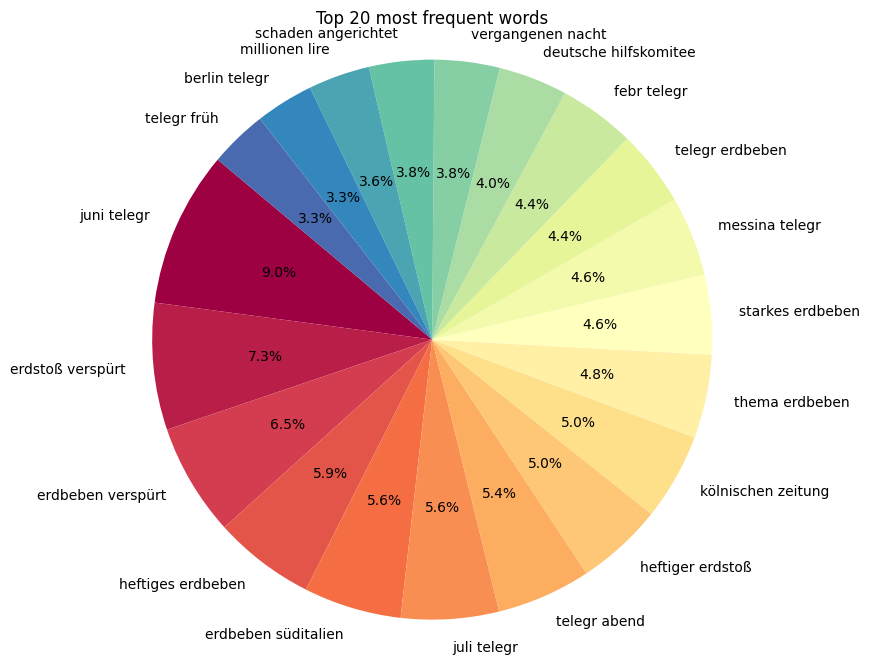

In [ ]:

def create_circle(word_count):
    labels = [word[0] for word in word_count]
    sizes = [word[1] for word in word_count]
    colors = [plt.cm.Spectral(i/float(len(labels))) for i in range(len(labels))]

    plt.figure(figsize=(10, 8))
    plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
    plt.axis('equal')
    plt.title('Top 20 most frequent words')
    plt.show()


create_circle(top_20_words)

In [ ]:
def tokenize(content):

    wordlist = []
    for word in content.split():
        for char in string.punctuation:
            word = word.strip(char)
        wordlist.append(word)

    words = [word for word in wordlist if not word.isdecimal()]
    tokens_without_sw = [word for word in words if word not in stopger]

    return tokens_without_sw

In [ ]:
# Extract year and month from publication_date
df['year'] = pd.to_datetime(df['publication_date']).dt.year
df['month'] = pd.to_datetime(df['publication_date']).dt.month


# Tokenize - handle NaN values
df['token'] = df['articles'].fillna('').apply(tokenize)


In [ ]:
def counting(tokens):
    counts = Counter(tokens)
    return counts

In [ ]:
df['counts'] = df['token'].apply(counting)
df

page_id  pagenumber  \
0    3ML37O5BXQD3EYOR5S777GQZKGDOCDIM-ALTO8633337_D...           2   
1    42H5V33ALNFVOIG4SBM4YW3WQVKKHDMO-ALTO8384861_D...          10   
2    42H5V33ALNFVOIG4SBM4YW3WQVKKHDMO-ALTO8384865_D...          14   
3    477TOWWZGBGVO2T47FBUNYAPVERZTJQC-ALTO8170232_D...           2   
4    477TOWWZGBGVO2T47FBUNYAPVERZTJQC-ALTO8170232_D...           2   
..                                                 ...         ...   
701  ZT3VEI3QIPQZVFINMECKRCDU4VKSFQVF-ALTO8400408_D...           5   
702  ZT3VEI3QIPQZVFINMECKRCDU4VKSFQVF-ALTO8400408_D...           5   
703  ZT3VEI3QIPQZVFINMECKRCDU4VKSFQVF-ALTO8400416_D...          13   
704  ZTM7Q6B27QTTQH4XTGBXI6Z27BF6EVM4-ALTO8536711_D...          14   
705  ZZICKYZ27YW3M2A5P5BUP6G6DGNXMYKN-ALTO8420754_D...           2   

                      paper_title                   provider_ddb_id  \
0    Kölnische Zeitung. 1803-1945  VKNQFFAKOR4XZWJJKUX3NGYSZ3QZAXCW   
1    Kölnische Zeitung. 1803-1945  VKNQFFAKOR4XZWJJKUX3NGYSZ3QZAXCW   
2    Kölnische Zeitung. 1803-1945  VKNQFFAKOR4XZWJJKUX3NGYSZ3QZAXCW   
3    Kölnische Zeitung. 1803-1945  VKNQFFAKOR4XZWJJKUX3NGYSZ3QZAXCW   
4    Kölnische Zeitung. 1803-1945  VKNQFFAKOR4XZWJJKUX3NGYSZ3QZAXCW   
..                            ...                               ...   
701  Kölnische Zeitung. 1803-1945  VKNQFFAKOR4XZWJJKUX3NGYSZ3QZAXCW   
702  Kölnische Zeitung. 1803-1945  VKNQFFAKOR4XZWJJKUX3NGYSZ3QZAXCW   
703  Kölnische Zeitung. 1803-1945  VKNQFFAKOR4XZWJJKUX3NGYSZ3QZAXCW   
704  Kölnische Zeitung. 1803-1945  VKNQFFAKOR4XZWJJKUX3NGYSZ3QZAXCW   
705  Kölnische Zeitung. 1803-1945  VKNQFFAKOR4XZWJJKUX3NGYSZ3QZAXCW   

                                              provider     zdb_id  \
0    Universitäts- und Landesbibliothek der Rheinis...  2719361-5   
1    Universitäts- und Landesbibliothek der Rheinis...  2719361-5   
2    Universitäts- und Landesbibliothek der Rheinis...  2719361-5   
3    Universitäts- und Landesbibliothek der Rheinis...  2719361-5   
4    Universitäts- und Landesbibliothek der Rheinis...  2719361-5   
..                                                 ...        ...   
701  Universitäts- und Landesbibliothek der Rheinis...  2719361-5   
702  Universitäts- und Landesbibliothek der Rheinis...  2719361-5   
703  Universitäts- und Landesbibliothek der Rheinis...  2719361-5   
704  Universitäts- und Landesbibliothek der Rheinis...  2719361-5   
705  Universitäts- und Landesbibliothek der Rheinis...  2719361-5   

       publication_date                      place_of_distribution language  \
0   1911-12-23 12:00:00  ['Köln', 'Kleve (Kreis Kleve)', 'Jülich']  ['ger']   
1   1910-06-07 12:00:00  ['Köln', 'Kleve (Kreis Kleve)', 'Jülich']  ['ger']   
2   1910-06-07 12:00:00  ['Köln', 'Kleve (Kreis Kleve)', 'Jülich']  ['ger']   
3   1909-04-18 12:00:00  ['Köln', 'Kleve (Kreis Kleve)', 'Jülich']  ['ger']   
4   1909-04-18 12:00:00  ['Köln', 'Kleve (Kreis Kleve)', 'Jülich']  ['ger']   
..                  ...                                        ...      ...   
701 1910-07-23 12:00:00  ['Köln', 'Kleve (Kreis Kleve)', 'Jülich']  ['ger']   
702 1910-07-23 12:00:00  ['Köln', 'Kleve (Kreis Kleve)', 'Jülich']  ['ger']   
703 1910-07-23 12:00:00  ['Köln', 'Kleve (Kreis Kleve)', 'Jülich']  ['ger']   
704 1911-05-15 12:00:00  ['Köln', 'Kleve (Kreis Kleve)', 'Jülich']  ['ger']   
705 1910-10-26 12:00:00  ['Köln', 'Kleve (Kreis Kleve)', 'Jülich']  ['ger']   

                                thumbnail  \
0    dac9b430-b364-4fa9-9367-0e9c795c1103   
1    0b5c3ed6-af50-4ea1-a206-78bf2e260dc1   
2    0b5c3ed6-af50-4ea1-a206-78bf2e260dc1   
3    457082cd-ea69-4273-a359-82e5ec7191d9   
4    457082cd-ea69-4273-a359-82e5ec7191d9   
..                                    ...   
701  457f5a5c-fe51-4434-aa70-8dc5dbc22f93   
702  457f5a5c-fe51-4434-aa70-8dc5dbc22f93   
703  457f5a5c-fe51-4434-aa70-8dc5dbc22f93   
704  a2a2c6b6-f29e-4369-9116-ed1053dec45a   
705  00e520b8-b92e-46db-b945-431bdf42b34b   

                                  

In [ ]:
import plotly.express as px

word_to_analyze = 'Opfer'
df['year'] = df['year'].astype(int)
df['month'] = df['month'].astype(int)

# Create year-month column for better plotting
df['year_month'] = pd.to_datetime(df['year'].astype(str) + '-' + df['month'].astype(str) + '-01')

word_counts = df[['year_month', 'counts']].copy()
word_counts['count'] = word_counts['counts'].apply(lambda x: x.get(word_to_analyze, 0))
word_counts = word_counts.groupby('year_month')['count'].sum().reset_index()

fig = px.line(word_counts, x='year_month', y='count',
              title=f'Häufigkeit des Wortes "{word_to_analyze}" pro Monat',
              height=550,
              markers=True)

fig.update_layout(
    xaxis_title='Jahr-Monat',
    yaxis_title='Häufigkeit',
    hovermode='x unified'
)

fig.show()

In [ ]:
entry_counts = df.groupby('year_month').size().reset_index(name='entry_count')

fig2 = go.Figure()
fig2.add_trace(go.Scatter(x=word_counts['year_month'], y=word_counts['count'],
                          mode='lines', name=f'Häufigkeit des Wortes "{word_to_analyze}"'))
fig2.add_trace(go.Scatter(x=entry_counts['year_month'], y=entry_counts['entry_count'],
                          mode='lines', name='Anzahl der Einträge'))

fig2.update_layout(
    title=f'Häufigkeit des Wortes "{word_to_analyze}" und Anzahl der Einträge pro Monat',
    xaxis_title='Jahr-Monat',
    yaxis_title='Werte',
    height=550
)

fig2.show()

In [26]:
words_to_compare = ['Opfer', 'Deutschland', 'Hilfe', 'Krieg']

fig = go.Figure()

# Calculate total words per month
df['total_words'] = df['counts'].apply(lambda x: sum(x.values()))
total_per_month = df.groupby('year_month')['total_words'].sum()

for word in words_to_compare:
    word_counts_temp = df[['year_month', 'counts']].copy()
    word_counts_temp['count'] = word_counts_temp['counts'].apply(lambda x: x.get(word, 0))
    monthly = word_counts_temp.groupby('year_month')['count'].sum()
    relative_freq = (monthly / total_per_month) * 1000  # per 1000 words
    fig.add_trace(go.Scatter(x=relative_freq.index, y=relative_freq.values, mode='lines', name=word))

fig.update_layout(
    title='Relative Worthäufigkeiten (pro 1000 Wörter)',
    xaxis_title='Jahr-Monat',
    yaxis_title='Häufigkeit pro 1000 Wörter',
    height=550
)

fig.show()

In [27]:
# Co-occurrence within a window (e.g., 5 words before/after)
word_to_analyze = 'Opfer'
window_size = 10

cooccurring_words = {}

for tokens in df['token']:
    if isinstance(tokens, list):  # Make sure it's a list
        for i, word in enumerate(tokens):
            if word == word_to_analyze:
                # Get words within window
                start = max(0, i - window_size)
                end = min(len(tokens), i + window_size + 1)

                for j in range(start, end):
                    if j != i and tokens[j] not in stopger:
                        cooccurring_words[tokens[j]] = cooccurring_words.get(tokens[j], 0) + 1

top_cooccurring = sorted(cooccurring_words.items(), key=lambda x: x[1], reverse=True)[:20]
print(f"Top Wörter innerhalb {window_size} Wörter von '{word_to_analyze}':")
for word, count in top_cooccurring:
    print(f"{word}: {count}")

Top Wörter innerhalb 10 Wörter von 'Opfer':
Telegr: 18
Jan: 16
: 15
Erdbeben: 14
Erdbebens: 10
Messina: 6
Das: 6
Zahl: 6
Mk: 6
Süditalien: 5
W: 5
gefordert: 4
Juni: 4
Tote: 4
In: 4
Rom: 4
Katastrophe: 4
Kiel: 3
seien: 3
zerstört: 3


In [40]:
# Co-occurrence within a window (e.g., 5 words before/after)
# This time also make all the words small(non capitalized)
word_to_analyze = 'Opfer'
window_size = 10

cooccurring_words = {}

for tokens in df['token']:
    if isinstance(tokens, list):  # Make sure it's a list
        for i, word in enumerate(tokens):
            if word.lower() == word_to_analyze.lower() and:
                # Get words within window
                start = max(0, i - window_size)
                end = min(len(tokens), i + window_size + 1)

                for j in range(start, end):
                    if j != i and tokens[j] not in stopger:
                        cooccurring_words[tokens[j].lower()] = cooccurring_words.get(tokens[j].lower(), 0) + 1

top_cooccurring = sorted(cooccurring_words.items(), key=lambda x: x[1], reverse=True)[:20]
print(f"Top Wörter innerhalb {window_size} Wörter von '{word_to_analyze}':")
for word, count in top_cooccurring:
    print(f"{word}: {count}")

Top Wörter innerhalb 10 Wörter von 'Opfer':
telegr: 18
jan: 16
: 15
erdbeben: 14
erdbebens: 10
messina: 6
das: 6
zahl: 6
mk: 6
süditalien: 5
w: 5
gefordert: 4
juni: 4
tote: 4
in: 4
rom: 4
katastrophe: 4
kiel: 3
italien: 3
seien: 3
